In [1]:
# !pip install covsirphy

In [2]:
from covid19dh import covid19
import covsirphy as cs
import numpy as np
import pandas as pd
import datetime
import matplotlib.pyplot as plt
import os
import seaborn as sns

In [3]:
os.makedirs("results/", exist_ok = True)

Import the data

In [4]:
data_loader     = cs.DataLoader("input")
# (Main) Data
jhu_data        = data_loader.jhu(verbose = False)
jhu_data.records(country = "Italy")
# (Main) Population in each country
population_data = data_loader.population()

We are using data for mobility and incidence that are subsets of the whole data available. In particular we are going to use data starting from: '2020-05-04' through '2020-10-20'.

In [5]:
lower_bound = datetime.datetime.strptime("2020-03-24", '%Y-%m-%d')
upper_bound = datetime.datetime.strptime("2021-01-08", '%Y-%m-%d')

Create an object of the kind "Scenario" which takes into account data from Italy and then subset data that are bounded between the above dates

In [6]:
National_scenario = cs.Scenario(jhu_data, population_data, country="Italy", province= None, tau=1440)
# Fix the first date of records
National_scenario.first_date = "24Mar2020"
# Fix the last date of records
National_scenario.last_date = "08Jan2021"

##### Data for mobility is:
#1) march 10   -  may 18 
#2) may 18     -  november 3 
#3) november 3 -  dicember 25

#For incidence we add 14 days
#1) March 24th    - June 02nd 
#2) June 02nd     - November 17th 
#3) November 17th - January 8th

Use the S-R trend analysis to divide the curve into different phases automatically

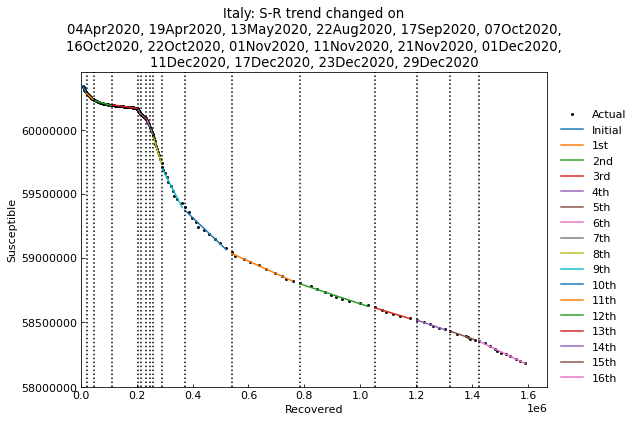

,Type,Start,End,Population
0th,Past,24Mar2020,03Apr2020,60421760
1st,Past,04Apr2020,18Apr2020,60421760
2nd,Past,19Apr2020,12May2020,60421760
3rd,Past,13May2020,21Aug2020,60421760
4th,Past,22Aug2020,16Sep2020,60421760
5th,Past,17Sep2020,06Oct2020,60421760
6th,Past,07Oct2020,15Oct2020,60421760
7th,Past,16Oct2020,21Oct2020,60421760
8th,Past,22Oct2020,31Oct2020,60421760
9th,Past,01Nov2020,10Nov2020,60421760


In [7]:
# cs.ChangeFinder(National_scenario.records(), max_rmsle=0.02)
National_scenario.trend()
National_scenario.summary()

# Fit using SEWIRF model

In [8]:
## Default value of timeout is 180 sec
# snl.estimate(cs.SIRF, timeout=60)
National_scenario.estimate(cs.SEWIRF, timeout = 360)
National_scenario.summary()


<SEWIR-F model: parameter estimation>
Running optimization with 4 CPUs...
	 1st phase (24Mar2020 - 03Apr2020): finished 1890 trials in 6 min  5 sec
	 4th phase (11Nov2020 - 20Nov2020): finished 1882 trials in 6 min  5 sec
	16th phase (23Dec2020 - 28Dec2020): finished 1879 trials in 6 min  5 sec
	 8th phase (21Nov2020 - 30Nov2020): finished 1910 trials in 6 min  6 sec
	 5th phase (07Oct2020 - 15Oct2020): finished 1901 trials in 6 min  5 sec
	 7th phase (11Dec2020 - 16Dec2020): finished 1904 trials in 6 min  5 sec
	 0th phase (17Sep2020 - 06Oct2020): finished 1886 trials in 6 min  5 sec
	15th phase (04Apr2020 - 18Apr2020): finished 1893 trials in 6 min  5 sec
	 9th phase (22Oct2020 - 31Oct2020): finished 1985 trials in 6 min  4 sec
	 3rd phase (29Dec2020 - 08Jan2021): finished 1989 trials in 6 min  4 sec
	12th phase (01Nov2020 - 10Nov2020): finished 1965 trials in 6 min  4 sec
	10th phase (13May2020 - 21Aug2020): finished 1888 trials in 6 min  5 sec
	 2nd phase (19Apr2020 - 12May2020): 

,Type,Start,End,Population,ODE,Rt,theta,kappa,rho1,rho2,...,tau,1/beta3 [day],alpha1 [-],1/beta1 [day],1/alpha2 [day],1/gamma [day],1/beta2 [day],RMSLE,Trials,Runtime
0th,Past,24Mar2020,03Apr2020,60421760,SEWIR-F,7.34,0.153061,0.000625,0.112807,0.784160,...,1440,1,0.153,8,1601,63,1,0.077526,1890,6 min 5 sec
1st,Past,04Apr2020,18Apr2020,60421760,SEWIR-F,5.02,0.173407,0.000190,0.065405,0.343616,...,1440,1,0.173,15,5254,53,2,0.055957,1893,6 min 5 sec
2nd,Past,19Apr2020,12May2020,60421760,SEWIR-F,2.20,0.136536,0.000857,0.029594,0.295724,...,1440,1,0.137,33,1167,40,3,0.056893,1834,6 min 5 sec
3rd,Past,13May2020,21Aug2020,60421760,SEWIR-F,0.00,0.271404,0.000650,0.030522,0.848302,...,1440,527,0.271,32,1537,30,1,0.063554,1888,6 min 5 sec
4th,Past,22Aug2020,16Sep2020,60421760,SEWIR-F,5.44,0.022269,0.000611,0.064810,0.731706,...,1440,1,0.022,15,1637,69,1,0.056337,1827,6 min 5 sec
5th,Past,17Sep2020,06Oct2020,60421760,SEWIR-F,2.76,0.019028,0.000152,0.047401,0.669947,...,1440,1,0.019,21,6567,54,1,0.025781,1886,6 min 5 sec
6th,Past,07Oct2020,15Oct2020,60421760,SEWIR-F,14.70,0.000217,0.000645,0.135525,0.564676,...,1440,1,0.000,7,1550,66,1,0.038052,1901,6 min 5 sec
7th,Past,16Oct2020,21Oct2020,60421760,SEWIR-F,11.33,0.016722,0.000007,0.183024,0.966487,...,1440,1,0.017,5,136882,81,1,0.037931,1821,6 min 6 sec
8th,Past,22Oct2020,31Oct2020,60421760,SEWIR-F,11.01,0.000313,0.000291,0.147249,0.997366,...,1440,1,0.000,6,3430,80,1,0.048575,1985,6 min 4 sec
9th,Past,01Nov2020,10Nov2020,60421760,SEWIR-F,7.25,0.000231,0.000500,0.113897,0.795086,...,1440,1,0.000,8,1998,65,1,0.041707,1965,6 min 4 sec


In [9]:
actual_filename = 'results/Italy_SEWIRF.csv'
National_scenario.summary().to_csv(actual_filename, index = False)

Plot how $\rho$ changes in time.

$\rho$ in our model coincides with $\beta$

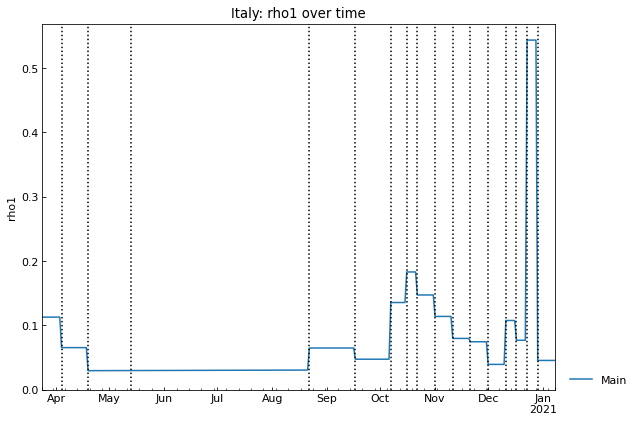

In [11]:
_ = National_scenario.history(target="rho1")

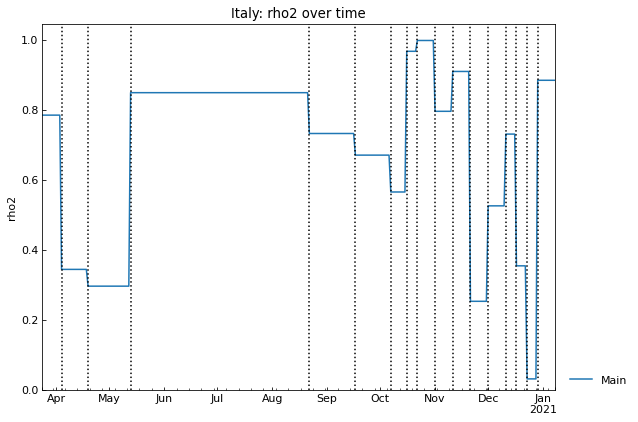

In [12]:
_ = National_scenario.history(target="rho2")

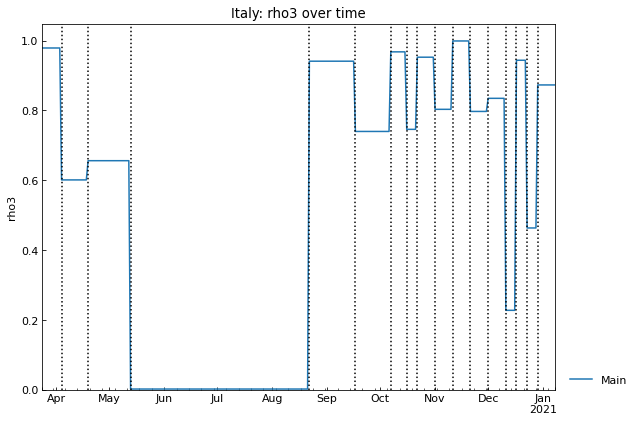

In [14]:
_ = National_scenario.history(target="rho3")

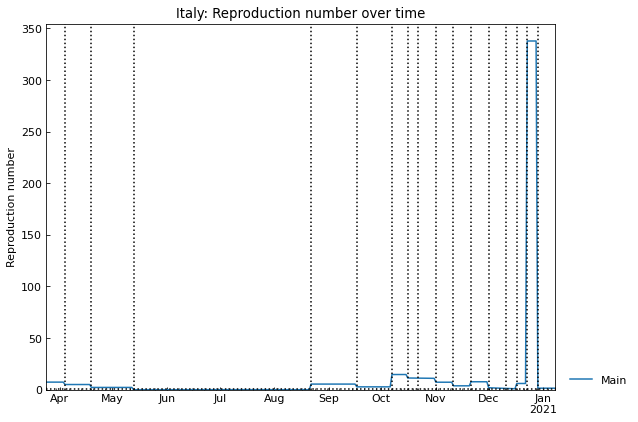

In [13]:
_ = National_scenario.history(target="Rt")

# Do the same analysis with provinces

Obtain the list of provinces, and later create a dictionary

In [15]:
data            = pd.read_csv("input/covid19dh.csv", low_memory = False)
data_italy      = data[data.ISO3 == 'ITA']
provinces_list  = data_italy.loc[:,"Province/State"].dropna().unique().tolist()

actual_filename = 'results/Italy_SEWIRF.csv'

#create an empty dictionary to access the nameof the region given the key and the list of scenarios.
#key equal to zero corresponds to italian data
csv_filenames_SEWIRF  = []
csv_filenames_SEWIRF.append(actual_filename)

scenarios_list_SEWIRF = []
scenarios_list_SEWIRF.append(National_scenario)

province_dict = {}
province_dict.update({0 : "Italy"})

for i, province in enumerate(provinces_list):
    province_dict.update({i+1 : province})
    scenarios_list_SEWIRF.append(cs.Scenario(jhu_data, population_data, country="Italy",
                                      province = province, tau=1440))

Start with the same analysis, and first subset the data by datetime. Later define the phases using S-R comparison


Now dealing with data of:  Friuli Venezia Giulia
Step:  1 / 22


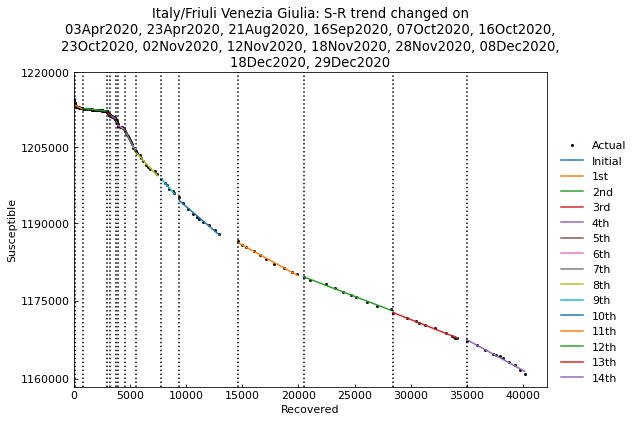


<SEWIR-F model: parameter estimation>
Running optimization with 4 CPUs...
	 0th phase (03Apr2020 - 22Apr2020): finished 2039 trials in 6 min  4 sec
	 4th phase (18Dec2020 - 28Dec2020): finished 2051 trials in 6 min  4 sec
	 1st phase (12Nov2020 - 17Nov2020): finished 2011 trials in 6 min  4 sec
	 7th phase (16Oct2020 - 22Oct2020): finished 2029 trials in 6 min  4 sec


In [ ]:
#skip the number "0" that is italy
for i, scenario in enumerate(scenarios_list_SEWIRF[1:]):
    #index that can access the dictionary for the regions is shifted by 1
    index = i + 1
    actual_province = province_dict.get(index)
    print("\nNow dealing with data of: ", actual_province)
    print("Step: ", index, "/", len(scenarios_list_SEWIRF))
    
    # Fix the first date of records
    scenario.first_date = "24Mar2020"
    # Fix the last date of records
    scenario.last_date = "08Jan2021"
    scenario.trend(set_phases=True)
    scenario.estimate(cs.SEWIRF, timeout = 360)
    
    actual_filename = 'results/'+actual_province+'_SEWIRF.csv'
    csv_filenames_SEWIRF.append(actual_filename)
    scenario.summary().to_csv(actual_filename, index = False)

In [ ]:
# !zip -r /content/SEWIRF-results.zip /content/results
# from google.colab import files
# files.download("/content/SEWIRF-results.zip")

Let's create a list of dataframes for 
+ SEWIRF model

estimations of hyperparameters $\rho$ ($\beta$), $\gamma$ ($\mu$) and average exposed and waiting-for-result time

## See

In [80]:
def GetKey(val, dictionary):
    for key, value in dictionary.items():
        if val == value:
            return key
    return -1

def plot_history_from_list(list_dataframes, province_dict, param):
    
    #plot the history of "param"
    
    fig, ax = plt.subplots(figsize = (20,10))
    
    for index,j in enumerate(list_dataframes):
        
        df = j.copy()
        
        if param not in df.columns.tolist(): 
            "Parameter not present, exit"
            break
        
        df["Start"] = df["Start"].apply(lambda x: datetime.datetime.strptime(x, '%d%b%Y'))
        df["End"]   = df["End"].apply(lambda x: datetime.datetime.strptime(x, '%d%b%Y'))

        ts_list  = []
        param_list = []

        for i,row in enumerate(df.iterrows()):
            time_series_list = pd.date_range(start=df.loc[:,"Start"][i],end=df.loc[:,"End"][i])

            for date in time_series_list:
                ts_list.append(date)
                param_list.append(row[1].loc[param])

        new_df = pd.DataFrame([ts_list,param_list]).T
        new_df.columns = ["Date", "param"]
        ax.plot(new_df.Date, new_df.param, label = province_dict.get(index))
        
    ax.set_xlabel("Date")
    ax.set_ylabel(param)
    ax.legend()
    
    return



def plot_history_select_from_list(list_dataframes, province_dict, which_to_be_plot, param):
    
    #plot the history of "param" some of the regions/provinces selected by "which_to_be_plot"
    
    fig, ax = plt.subplots(figsize = (20,10))
    
    for single_plot in which_to_be_plot:
        if type(single_plot) == 'str':
            j = GetKey(single_plot, province_dict)
            df = list_dataframes[j].copy()
            label_region = single_plot
        else: 
            label_region = province_dict.get(single_plot)
            df = list_dataframes[single_plot].copy()
        
        if param not in df.columns.tolist(): 
            "Parameter not present, exit"
            break
        
        df["Start"] = df["Start"].apply(lambda x: datetime.datetime.strptime(x, '%d%b%Y'))
        df["End"]   = df["End"].apply(lambda x: datetime.datetime.strptime(x, '%d%b%Y'))

        ts_list  = []
        param_list = []

        for i,row in enumerate(df.iterrows()):
            time_series_list = pd.date_range(start=df.loc[:,"Start"][i],end=df.loc[:,"End"][i])

            for date in time_series_list:
                ts_list.append(date)
                param_list.append(row[1].loc[param])

        new_df = pd.DataFrame([ts_list,param_list]).T
        new_df.columns = ["Date", "param"]
        ax.plot(new_df.Date, new_df.param, label = label_region)
        
    ax.set_xlabel("Date")
    ax.set_ylabel(param)
    ax.legend()
    
    return

In [81]:
SEWIRF_df_list = []
# for i, scenario in enumerate(scenarios_list_SEWIRF):
for i in np.arange(22):
    actual_province = province_dict.get(i)
    actual_filename = 'results/'+actual_province+'_SEWIRF.csv'
    SEWIRF_df_list.append(pd.read_csv(actual_filename))

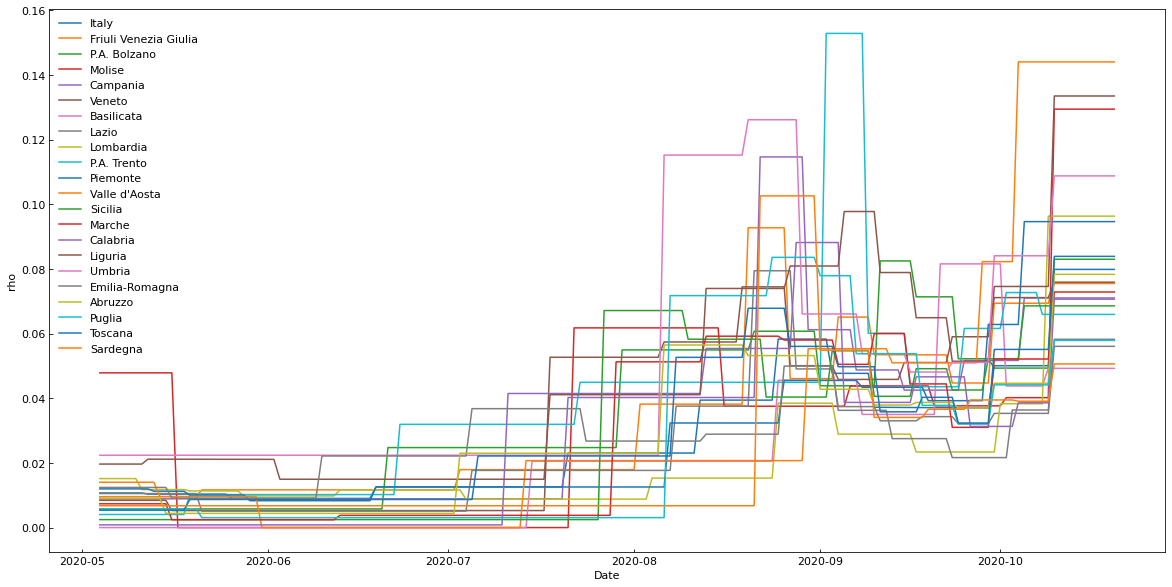

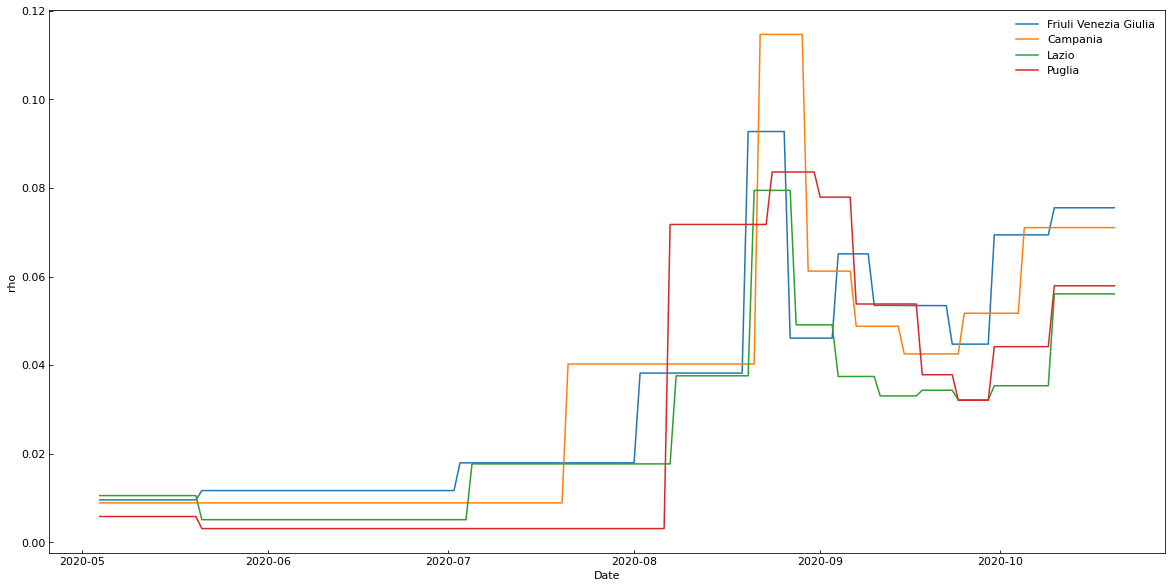

In [84]:
plot_history_from_list(SEWIRF_df_list, province_dict, "rho")
plot_history_select_from_list(SEWIRF_df_list, province_dict, [1,4,7,19], "rho")